# 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import os as os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import scipy as sp
from scipy.special import boxcox1p
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.combine import *
from sklearn.impute import SimpleImputer
plt.style.use('seaborn')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# 데이터 불러오기

In [0]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Crime/train.csv',parse_dates=['Dates'])
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Crime/test.csv',parse_dates=['Dates'],index_col='Id')
sample_submission = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Crime/sampleSubmission.csv')

In [3]:
train.Dates.describe()

count                  878049
unique                 389257
top       2011-01-01 00:01:00
freq                      185
first     2003-01-06 00:01:00
last      2015-05-13 23:53:00
Name: Dates, dtype: object

In [4]:
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [5]:
test

,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
...,...,...,...,...,...,...
884257,2003-01-01 00:01:00,Wednesday,MISSION,2600 Block of BRYANT ST,-122.408983,37.751987
884258,2003-01-01 00:01:00,Wednesday,NORTHERN,1900 Block of WASHINGTON ST,-122.425342,37.792681
884259,2003-01-01 00:01:00,Wednesday,INGLESIDE,5500 Block of MISSION ST,-122.445418,37.712075


Dates - 범죄가 일어난 일시

Category - 범죄 유형 (이 값이 Target variable임)

Descript - 범죄에 대한 자세한 설명

DayOfWeek - 요일

PdDistrict - 경찰 관할 지역 명칭

Resolution - 범죄 해결 여부

Address - 범죄 발생 주소

X - 경도(Longitude)

Y - 위도(Latitude)

In [0]:
test_id=test.index

In [0]:
test_id=pd.DataFrame(test_id)

# 데이터 구조 변경

중복된 값 및 이상치 제거

In [8]:
train.duplicated().sum()

2323

In [9]:
train.drop_duplicates(inplace=True)
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [0]:
outlier=[660485, 660711, 660712, 661106, 666430, 667042, 669946, 671709,
            673078, 673114, 673115, 673510, 674043, 675070, 675073, 675288,
            675540, 677036, 677260, 677268, 677828, 678326, 678539, 678540,
            679643, 682780, 683862, 684406, 685719, 685720, 686997, 687519,
            687527, 688950, 692258, 712309, 719993, 727080, 754828, 756059,
            759292, 759397, 767318, 767501, 767502, 772415, 772431, 773159,
            783919, 788574, 788575, 789255, 798834, 823378, 833362, 833921,
            839585, 842259, 842261, 842434, 842435, 842828, 844995, 845842,
            852880, 857248, 871198]

In [11]:
len(outlier)

67

In [12]:
train=train.drop(index=outlier)
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


데이터 구조 변경

In [0]:
def feature_engineering(data):
    data['Date'] = pd.to_datetime(data['Dates'].dt.date)
    data['n_days'] = (
        data['Date'] - data['Date'].min()).apply(lambda x: x.days)
    data['Day'] = data['Dates'].dt.day
    data['DayOfWeek'] = data['Dates'].dt.weekday
    data['Month'] = data['Dates'].dt.month
    data['Year'] = data['Dates'].dt.year
    data['Hour'] = data['Dates'].dt.hour
    data['Minute'] = data['Dates'].dt.minute
    data['Block'] = data['Address'].str.contains('block', case=False)
    
    data.drop(columns=['Dates','Date','Address'], inplace=True)
        
    return data

In [14]:
train = feature_engineering(train)
train.drop(columns=['Descript','Resolution'], inplace=True)
test = feature_engineering(test)
train

,Category,DayOfWeek,PdDistrict,X,Y,n_days,Day,Month,Year,Hour,Minute,Block
0,WARRANTS,2,NORTHERN,-122.425892,37.774599,4510,13,5,2015,23,53,False
1,OTHER OFFENSES,2,NORTHERN,-122.425892,37.774599,4510,13,5,2015,23,53,False
2,OTHER OFFENSES,2,NORTHERN,-122.424363,37.800414,4510,13,5,2015,23,33,False
3,LARCENY/THEFT,2,NORTHERN,-122.426995,37.800873,4510,13,5,2015,23,30,True
4,LARCENY/THEFT,2,PARK,-122.438738,37.771541,4510,13,5,2015,23,30,True
...,...,...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,0,TARAVAL,-122.459033,37.714056,0,6,1,2003,0,15,False
878045,LARCENY/THEFT,0,INGLESIDE,-122.447364,37.731948,0,6,1,2003,0,1,True
878046,LARCENY/THEFT,0,SOUTHERN,-122.403390,37.780266,0,6,1,2003,0,1,False
878047,VANDALISM,0,SOUTHERN,-122.390531,37.780607,0,6,1,2003,0,1,False


In [15]:
test

,DayOfWeek,PdDistrict,X,Y,n_days,Day,Month,Year,Hour,Minute,Block
Id,,,,,,,,,,,
0,6,BAYVIEW,-122.399588,37.735051,4512,10,5,2015,23,59,True
1,6,BAYVIEW,-122.391523,37.732432,4512,10,5,2015,23,51,False
2,6,NORTHERN,-122.426002,37.792212,4512,10,5,2015,23,50,True
3,6,INGLESIDE,-122.437394,37.721412,4512,10,5,2015,23,45,True
4,6,INGLESIDE,-122.437394,37.721412,4512,10,5,2015,23,45,True
...,...,...,...,...,...,...,...,...,...,...,...
884257,2,MISSION,-122.408983,37.751987,0,1,1,2003,0,1,True
884258,2,NORTHERN,-122.425342,37.792681,0,1,1,2003,0,1,True
884259,2,INGLESIDE,-122.445418,37.712075,0,1,1,2003,0,1,True


In [16]:
train['PdDistrict'].value_counts()

SOUTHERN      156520
MISSION       119722
NORTHERN      105093
BAYVIEW        89089
CENTRAL        85262
TENDERLOIN     81627
INGLESIDE      78718
TARAVAL        65396
PARK           49159
RICHMOND       45073
Name: PdDistrict, dtype: int64

타겟값 및 범주형 변수 인코딩

In [0]:
#PdDistrict , Category 변수를 LableEncoding

le1 = LabelEncoder()
train['PdDistrict'] = le1.fit_transform(train['PdDistrict'])
test['PdDistrict'] = le1.transform(test['PdDistrict'])

le2 = LabelEncoder()
train_x = train.drop(columns=['Category'])
train_y= le2.fit_transform(train['Category'])

In [18]:
train_x

,DayOfWeek,PdDistrict,X,Y,n_days,Day,Month,Year,Hour,Minute,Block
0,2,4,-122.425892,37.774599,4510,13,5,2015,23,53,False
1,2,4,-122.425892,37.774599,4510,13,5,2015,23,53,False
2,2,4,-122.424363,37.800414,4510,13,5,2015,23,33,False
3,2,4,-122.426995,37.800873,4510,13,5,2015,23,30,True
4,2,5,-122.438738,37.771541,4510,13,5,2015,23,30,True
...,...,...,...,...,...,...,...,...,...,...,...
878044,0,8,-122.459033,37.714056,0,6,1,2003,0,15,False
878045,0,2,-122.447364,37.731948,0,6,1,2003,0,1,True
878046,0,7,-122.403390,37.780266,0,6,1,2003,0,1,False
878047,0,7,-122.390531,37.780607,0,6,1,2003,0,1,False


In [19]:
train_y_d=pd.DataFrame(train_y)
train_y_d.apply(pd.value_counts)

,0
16,174305
21,125943
20,91911
1,76811
7,53919
36,53697
35,44580
37,42137
4,36599
32,31392


In [20]:
test

,DayOfWeek,PdDistrict,X,Y,n_days,Day,Month,Year,Hour,Minute,Block
Id,,,,,,,,,,,
0,6,0,-122.399588,37.735051,4512,10,5,2015,23,59,True
1,6,0,-122.391523,37.732432,4512,10,5,2015,23,51,False
2,6,4,-122.426002,37.792212,4512,10,5,2015,23,50,True
3,6,2,-122.437394,37.721412,4512,10,5,2015,23,45,True
4,6,2,-122.437394,37.721412,4512,10,5,2015,23,45,True
...,...,...,...,...,...,...,...,...,...,...,...
884257,2,3,-122.408983,37.751987,0,1,1,2003,0,1,True
884258,2,4,-122.425342,37.792681,0,1,1,2003,0,1,True
884259,2,2,-122.445418,37.712075,0,1,1,2003,0,1,True


시각화

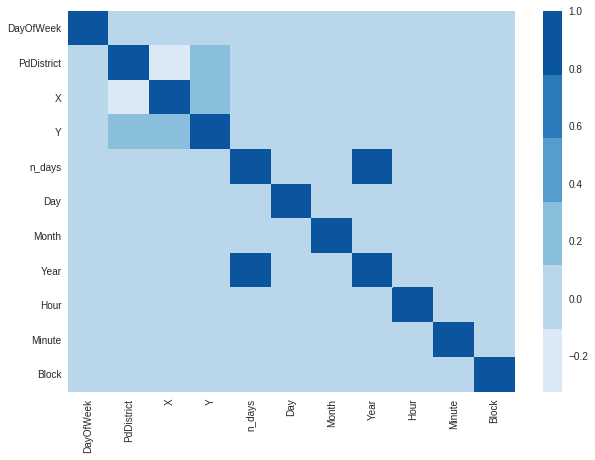

In [21]:
corr = train.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

## n_day를 고려해야함

언더샘플링(TomekLinks)

In [22]:
tl=TomekLinks()
tl_train_x,tl_train_y = tl.fit_sample(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [23]:
tl_X_train=pd.DataFrame(tl_train_x)
tl_X_train.columns=['DayOfWeek',	'PdDistrict',	'X',	'Y',	'n_days',	'Day',	'Month',	'Year',	'Hour','Minute',	'Block']
tl_X_train

,DayOfWeek,PdDistrict,X,Y,n_days,Day,Month,Year,Hour,Minute,Block
0,2.0,4.0,-122.425892,37.774599,4510.0,13.0,5.0,2015.0,23.0,53.0,0.0
1,2.0,4.0,-122.425892,37.774599,4510.0,13.0,5.0,2015.0,23.0,53.0,0.0
2,2.0,4.0,-122.424363,37.800414,4510.0,13.0,5.0,2015.0,23.0,33.0,0.0
3,2.0,4.0,-122.426995,37.800873,4510.0,13.0,5.0,2015.0,23.0,30.0,1.0
4,2.0,5.0,-122.438738,37.771541,4510.0,13.0,5.0,2015.0,23.0,30.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
666842,0.0,6.0,-122.472985,37.782552,0.0,6.0,1.0,2003.0,0.0,31.0,0.0
666843,0.0,0.0,-122.389769,37.730564,0.0,6.0,1.0,2003.0,0.0,20.0,1.0
666844,0.0,0.0,-122.389769,37.730564,0.0,6.0,1.0,2003.0,0.0,20.0,1.0
666845,0.0,2.0,-122.447364,37.731948,0.0,6.0,1.0,2003.0,0.0,1.0,1.0


In [24]:
tl_y_d=pd.DataFrame(tl_train_y)
tl_y_d.apply(pd.value_counts)

,0
16,126660
21,100866
20,62537
1,60265
7,49112
36,41874
37,36251
35,29301
4,23396
32,21576


In [25]:
tl_y_d.columns=['counts']
tl_y_d

,counts
0,37
1,21
2,21
3,16
4,16
...,...
666842,21
666843,1
666844,21
666845,16


K-FOld CV

In [0]:
# # CV model
# xgb=XGBClassifier()
# kfold = StratifiedKFold(n_splits=5)
# results = cross_val_score(xgb, tl_X_train, tl_train_y, cv=kfold)
# print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

홀드아웃(tl)

In [0]:
from sklearn.model_selection import train_test_split
tl_X_train, tl_X_valid, tl_y_train, tl_y_valid = train_test_split(tl_X_train, tl_train_y, \
                                                  test_size=0.2, random_state=42, stratify = tl_train_y)


In [27]:
tl_X_valid=pd.DataFrame(tl_X_valid)
tl_X_valid.columns=['DayOfWeek',	'PdDistrict',	'X',	'Y',	'n_days',	'Day',	'Month',	'Year',	'Hour','Minute',	'Block']
tl_X_valid

,DayOfWeek,PdDistrict,X,Y,n_days,Day,Month,Year,Hour,Minute,Block
197312,2.0,7.0,-122.409893,37.780113,3278.0,28.0,12.0,2011.0,13.0,29.0,1.0
118680,4.0,8.0,-122.474506,37.722113,3784.0,17.0,5.0,2013.0,0.0,1.0,1.0
533057,3.0,5.0,-122.432311,37.768377,878.0,2.0,6.0,2005.0,17.0,30.0,1.0
616693,6.0,3.0,-122.407538,37.765783,314.0,16.0,11.0,2003.0,2.0,0.0,0.0
454763,1.0,2.0,-122.448702,37.739277,1450.0,26.0,12.0,2006.0,0.0,45.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
246408,3.0,9.0,-122.412193,37.781605,2929.0,13.0,1.0,2011.0,3.0,58.0,1.0
287634,2.0,8.0,-122.468612,37.729598,2648.0,7.0,4.0,2010.0,9.0,45.0,0.0
329399,1.0,3.0,-122.419561,37.752959,2346.0,9.0,6.0,2009.0,17.0,45.0,1.0
329297,3.0,1.0,-122.407327,37.790399,2348.0,11.0,6.0,2009.0,1.0,0.0,1.0


# 모델링

XGB

In [0]:
%%time
xgb_c1 = XGBClassifier(n_estimators=100, n_jobs=-1, learning_rate=0.05,max_depth=10)
xgb_c1.fit(tl_X_train,tl_y_train, early_stopping_rounds=10,eval_metric='mlogloss',eval_set=[(tl_X_train, tl_y_train), (tl_X_valid, tl_y_valid)])

[0]	validation_0-mlogloss:3.52094	validation_1-mlogloss:3.52824
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:3.41369	validation_1-mlogloss:3.42696
[2]	validation_0-mlogloss:3.32523	validation_1-mlogloss:3.34415
[3]	validation_0-mlogloss:3.24948	validation_1-mlogloss:3.27335
[4]	validation_0-mlogloss:3.18321	validation_1-mlogloss:3.2116
[5]	validation_0-mlogloss:3.12432	validation_1-mlogloss:3.15698
[6]	validation_0-mlogloss:3.07047	validation_1-mlogloss:3.10726
[7]	validation_0-mlogloss:3.0215	validation_1-mlogloss:3.06231
[8]	validation_0-mlogloss:2.97653	validation_1-mlogloss:3.0212
[9]	validation_0-mlogloss:2.93527	validation_1-mlogloss:2.98369
[10]	validation_0-mlogloss:2.89667	validation_1-mlogloss:2.94871
[11]	validation_0-mlogloss:2.86084	validation_1-mlogloss:2.91638
[12]	validation_0-mlogloss:2.82731	validation_1-mlogloss:2.88621
[

In [0]:
xgb_c1_pred = xgb_c1.predict_proba(test)

In [0]:
submission=pd.DataFrame(data=xgb_c1_pred)
submission=pd.concat([test_id,submission],axis=1)
submission.columns=sample_submission.columns
submission

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0.002846,0.067439,0.001917,0.002914,0.043580,0.004711,0.008580,0.026950,0.008582,0.002309,0.002267,0.006510,0.003308,0.007342,0.001913,0.009984,0.044502,0.003914,0.002556,0.037550,0.074146,0.142328,0.001848,0.002437,0.001844,0.014642,0.004287,0.018984,0.042185,0.001990,0.032582,0.002202,0.067117,0.001835,0.007166,0.046030,0.193922,0.027616,0.027165
1,1,0.002064,0.056707,0.001643,0.003727,0.002460,0.003867,0.009611,0.072569,0.006101,0.001632,0.001621,0.004825,0.002157,0.007466,0.002457,0.003856,0.015286,0.003158,0.001908,0.010370,0.028357,0.384379,0.001584,0.001671,0.001580,0.034060,0.001701,0.020165,0.002157,0.001706,0.034325,0.001614,0.046458,0.001573,0.001820,0.017317,0.047898,0.133756,0.024395
2,2,0.011294,0.118920,0.001891,0.002847,0.052846,0.004798,0.003618,0.049194,0.012599,0.002055,0.001919,0.002058,0.005044,0.010246,0.001851,0.006526,0.235571,0.003385,0.001956,0.015094,0.073277,0.072360,0.001788,0.038923,0.001776,0.031249,0.002271,0.027558,0.015219,0.001820,0.006668,0.001983,0.032474,0.001775,0.012699,0.062228,0.017828,0.033614,0.020778
3,3,0.004894,0.118714,0.001742,0.006261,0.018242,0.003781,0.008598,0.021956,0.008230,0.002167,0.002036,0.009167,0.005621,0.021283,0.001738,0.011651,0.062777,0.003821,0.002018,0.031166,0.053441,0.090781,0.001679,0.005035,0.001675,0.031194,0.003953,0.022769,0.020388,0.001808,0.009439,0.002025,0.040541,0.001667,0.010849,0.101792,0.145020,0.033100,0.076981
4,4,0.004894,0.118714,0.001742,0.006261,0.018242,0.003781,0.008598,0.021956,0.008230,0.002167,0.002036,0.009167,0.005621,0.021283,0.001738,0.011651,0.062777,0.003821,0.002018,0.031166,0.053441,0.090781,0.001679,0.005035,0.001675,0.031194,0.003953,0.022769,0.020388,0.001808,0.009439,0.002025,0.040541,0.001667,0.010849,0.101792,0.145020,0.033100,0.076981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,884257,0.002203,0.059910,0.019355,0.002992,0.025014,0.003246,0.002297,0.036896,0.003053,0.112193,0.002791,0.002934,0.074913,0.064031,0.002112,0.004283,0.074478,0.002186,0.002006,0.016805,0.042660,0.152074,0.001937,0.002247,0.001919,0.006577,0.004523,0.020523,0.035638,0.009482,0.008215,0.005476,0.045987,0.001924,0.005441,0.029885,0.076742,0.023581,0.011468
884258,884258,0.001837,0.081745,0.010865,0.001706,0.043620,0.003193,0.001962,0.013929,0.002299,0.064300,0.002274,0.003021,0.111044,0.060424,0.001755,0.002265,0.166241,0.001809,0.001671,0.010894,0.035134,0.201845,0.001612,0.005140,0.001596,0.003097,0.002034,0.007727,0.010035,0.001700,0.006598,0.002083,0.058953,0.001600,0.004140,0.022468,0.036229,0.007151,0.004001
884259,884259,0.003758,0.092751,0.021757,0.002454,0.032848,0.003015,0.004738,0.015495,0.002662,0.018832,0.005685,0.003055,0.096295,0.048351,0.002476,0.013475,0.077301,0.002488,0.002285,0.021342,0.038681,0.162351,0.002204,0.003067,0.002183,0.004264,0.005059,0.019168,0.038027,0.005778,0.005368,0.019914,0.035320,0.002189,0.006444,0.038855,0.073339,0.059539,0.007186
884260,884260,0.006231,0.035963,0.021815,0.002463,0.020178,0.007787,0.001809,0.019312,0.002920,0.014150,0.003309,0.002312,0.046167,0.052946,0.002169,0.007208,0.047976,0.002972,0.001580,0.017956,0.036546,0.242049,0.001526,0.002219,0.001511,0.002838,0.004522,0.013591,0.022583,0.004001,0.003701,0.004759,0.029879,0.001515,0.008967,0.030226,0.246353,0.015712,0.010279


In [0]:
submission.to_csv('/content/drive/My Drive/Colab Notebooks/Crime/Crime(xgb)_sample_submission.csv', index=False)
### Score:2.31223

In [0]:
%%time
xgb_c2 = XGBClassifier(n_estimators=200, n_jobs=-1, learning_rate=0.05,reg_alpha=0.1,max_depth=15)
xgb_c2.fit(tl_X_train,tl_y_train, early_stopping_rounds=10,eval_metric='mlogloss',eval_set=[(tl_X_train, tl_y_train), (tl_X_valid, tl_y_valid)])

[0]	validation_0-mlogloss:3.4962	validation_1-mlogloss:3.52381
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:3.36695	validation_1-mlogloss:3.4193
[2]	validation_0-mlogloss:3.25847	validation_1-mlogloss:3.33418
[3]	validation_0-mlogloss:3.16356	validation_1-mlogloss:3.26127
[4]	validation_0-mlogloss:3.07969	validation_1-mlogloss:3.19788
[5]	validation_0-mlogloss:3.00398	validation_1-mlogloss:3.14147
[6]	validation_0-mlogloss:2.93492	validation_1-mlogloss:3.09065
[7]	validation_0-mlogloss:2.87156	validation_1-mlogloss:3.04481
[8]	validation_0-mlogloss:2.81232	validation_1-mlogloss:3.00282
[9]	validation_0-mlogloss:2.75796	validation_1-mlogloss:2.96453
[10]	validation_0-mlogloss:2.70677	validation_1-mlogloss:2.92899
[11]	validation_0-mlogloss:2.65816	validation_1-mlogloss:2.89579
[12]	validation_0-mlogloss:2.61262	validation_1-mlogloss:2.8648
[

In [0]:
xgb_c2_pred = xgb_c2.predict_proba(test)

In [0]:
submission=pd.DataFrame(data=xgb_c2_pred)
submission=pd.concat([test_id,submission],axis=1)
submission.columns=sample_submission.columns
submission

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0.001768,0.064887,0.000949,0.001810,0.037119,0.003766,0.016187,0.025802,0.006392,0.006241,0.003368,0.002129,0.003540,0.004568,0.001388,0.005085,0.048849,0.001630,0.002251,0.056604,0.087643,0.190651,0.000872,0.001954,0.000855,0.017031,0.003988,0.019445,0.008183,0.001177,0.019826,0.001096,0.133184,0.001963,0.005817,0.079490,0.069015,0.033326,0.030151
1,1,0.000614,0.016260,0.000434,0.002947,0.000733,0.001300,0.004231,0.034418,0.001535,0.000590,0.000387,0.000807,0.001173,0.002536,0.000822,0.002747,0.004197,0.000810,0.000447,0.005310,0.026664,0.694661,0.000370,0.000554,0.000363,0.009364,0.000518,0.019064,0.001058,0.000527,0.008394,0.000394,0.053919,0.000360,0.000419,0.006836,0.015951,0.072412,0.005877
2,2,0.008075,0.215113,0.000699,0.001904,0.013672,0.003471,0.005362,0.027696,0.008431,0.001209,0.000736,0.000976,0.002912,0.004044,0.000659,0.009700,0.342542,0.001094,0.000973,0.010978,0.058850,0.057241,0.000609,0.018814,0.000594,0.020427,0.001139,0.033922,0.010016,0.000629,0.002260,0.000760,0.029682,0.000593,0.011882,0.064047,0.012432,0.010854,0.005002
3,3,0.003424,0.116548,0.000955,0.007009,0.017682,0.003921,0.007208,0.022795,0.005416,0.002412,0.001489,0.011940,0.005533,0.024041,0.000948,0.017957,0.096966,0.002232,0.004507,0.027086,0.090572,0.085817,0.000877,0.006407,0.000861,0.042656,0.003266,0.028432,0.022184,0.001213,0.003625,0.001121,0.053445,0.000854,0.014974,0.071250,0.095150,0.036309,0.060919
4,4,0.003424,0.116548,0.000955,0.007009,0.017682,0.003921,0.007208,0.022795,0.005416,0.002412,0.001489,0.011940,0.005533,0.024041,0.000948,0.017957,0.096966,0.002232,0.004507,0.027086,0.090572,0.085817,0.000877,0.006407,0.000861,0.042656,0.003266,0.028432,0.022184,0.001213,0.003625,0.001121,0.053445,0.000854,0.014974,0.071250,0.095150,0.036309,0.060919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,884257,0.001772,0.042569,0.008697,0.005394,0.024231,0.002227,0.001207,0.019138,0.001866,0.123818,0.002114,0.001773,0.091330,0.103742,0.001705,0.004179,0.059275,0.001879,0.001278,0.013756,0.076032,0.133054,0.000900,0.001307,0.000870,0.006641,0.010025,0.018793,0.050785,0.007499,0.005360,0.003066,0.065475,0.000876,0.007672,0.020145,0.063985,0.007877,0.007692
884258,884258,0.000932,0.100052,0.004684,0.000685,0.034446,0.004644,0.000847,0.005711,0.001310,0.047144,0.002268,0.001316,0.108030,0.030605,0.000887,0.001344,0.190181,0.000869,0.000797,0.011985,0.032621,0.285315,0.000630,0.008268,0.000609,0.002028,0.001080,0.008204,0.005043,0.000736,0.004793,0.001140,0.035227,0.000613,0.002793,0.024995,0.030802,0.005263,0.001103
884259,884259,0.001779,0.083780,0.019349,0.002697,0.050186,0.002415,0.002560,0.006550,0.002511,0.012290,0.005106,0.001816,0.077194,0.039445,0.001263,0.011726,0.069011,0.001583,0.001324,0.006965,0.065418,0.246615,0.000926,0.002883,0.000896,0.002011,0.002411,0.041385,0.031712,0.003210,0.003296,0.008913,0.019208,0.000902,0.002762,0.023478,0.075610,0.064712,0.004102
884260,884260,0.004163,0.035165,0.041942,0.002230,0.015238,0.004739,0.001018,0.011371,0.001812,0.004473,0.002450,0.001209,0.046059,0.099563,0.001506,0.007363,0.029163,0.002037,0.000888,0.008846,0.029720,0.251174,0.000624,0.002438,0.000603,0.002537,0.004071,0.007704,0.015240,0.002596,0.001753,0.002004,0.007558,0.000607,0.007977,0.023706,0.302259,0.010050,0.006144


In [0]:
submission.to_csv('/content/drive/My Drive/Colab Notebooks/Crime/Crime(xgb2)_sample_submission.csv', index=False)
### Score:2.31263
## overfitting

LGBM(bayes)

In [28]:
tl_train_x=pd.DataFrame(tl_train_x)
tl_train_x.columns=['DayOfWeek',	'PdDistrict',	'X',	'Y',	'n_days',	'Day',	'Month',	'Year',	'Hour','Minute',	'Block']
tl_train_x

,DayOfWeek,PdDistrict,X,Y,n_days,Day,Month,Year,Hour,Minute,Block
0,2.0,4.0,-122.425892,37.774599,4510.0,13.0,5.0,2015.0,23.0,53.0,0.0
1,2.0,4.0,-122.425892,37.774599,4510.0,13.0,5.0,2015.0,23.0,53.0,0.0
2,2.0,4.0,-122.424363,37.800414,4510.0,13.0,5.0,2015.0,23.0,33.0,0.0
3,2.0,4.0,-122.426995,37.800873,4510.0,13.0,5.0,2015.0,23.0,30.0,1.0
4,2.0,5.0,-122.438738,37.771541,4510.0,13.0,5.0,2015.0,23.0,30.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
666842,0.0,6.0,-122.472985,37.782552,0.0,6.0,1.0,2003.0,0.0,31.0,0.0
666843,0.0,0.0,-122.389769,37.730564,0.0,6.0,1.0,2003.0,0.0,20.0,1.0
666844,0.0,0.0,-122.389769,37.730564,0.0,6.0,1.0,2003.0,0.0,20.0,1.0
666845,0.0,2.0,-122.447364,37.731948,0.0,6.0,1.0,2003.0,0.0,1.0,1.0


In [0]:
train_set = lgb.Dataset(
    tl_X_train, label=tl_y_train, categorical_feature=['PdDistrict'], free_raw_data=False)
valid_set = lgb.Dataset(tl_X_valid, label=tl_y_valid)

In [0]:
params = {'boosting':'gbdt',
          'objective':'multiclass',
          'num_class':39,
          'max_delta_step':0.9,
          'min_data_in_leaf': 21,
          'learning_rate': 0.4,
          'max_bin': 465,
          'num_leaves': 41,
          'early_stopping_rounds':10
         }

In [0]:
# num_boost_round = np.argmin(cv_results['multi_logloss-mean'])
# print('Best epoch: ', num_boost_round)

Best epoch:  9


In [31]:
%%time
bst = lgb.train(params, train_set, 1000 ,valid_sets=valid_set)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['PdDistrict']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1]	valid_0's multi_logloss: 2.5947
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's multi_logloss: 2.52352
[3]	valid_0's multi_logloss: 2.47283
[4]	valid_0's multi_logloss: 2.43504
[5]	valid_0's multi_logloss: 2.40728
[6]	valid_0's multi_logloss: 2.38538
[7]	valid_0's multi_logloss: 2.36719
[8]	valid_0's multi_logloss: 2.35336
[9]	valid_0's multi_logloss: 2.34168
[10]	valid_0's multi_logloss: 2.3325
[11]	valid_0's multi_logloss: 2.32385
[12]	valid_0's multi_logloss: 2.31758
[13]	valid_0's multi_logloss: 2.31221
[14]	valid_0's multi_logloss: 2.30694
[15]	valid_0's multi_logloss: 2.30239
[16]	valid_0's multi_logloss: 2.29881
[17]	valid_0's multi_logloss: 2.29606
[18]	valid_0's multi_logloss: 2.29261
[19]	valid_0's multi_logloss: 2.2899
[20]	valid_0's multi_logloss: 2.2878
[21]	valid_0's multi_logloss: 2.2858
[22]	valid_0's multi_logloss: 2.28394
[23]	valid_0's multi_logloss: 2.28271
[24]	valid_0's multi_logloss: 2.28065
[25]	valid_0's multi_logloss: 2.27909
[2

In [0]:
predictions = bst.predict(test)

In [33]:
submission=pd.DataFrame(data=predictions)
submission=pd.concat([test_id,submission],axis=1)
submission.columns=sample_submission.columns
submission

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0.001326,0.224736,9.634327e-09,9.233228e-08,0.036692,0.000213,0.012289,0.027178,0.001264,0.001419,1.904345e-07,0.000122,0.001254,0.002755,2.893387e-10,0.001436,0.109164,0.000169,2.705595e-06,0.074808,0.092213,0.132074,3.341094e-11,0.000009,0.000009,0.005621,0.000153,0.005634,0.000213,9.703463e-10,0.003921,7.774467e-07,0.075650,1.514039e-09,0.000738,0.049507,0.106766,0.026255,0.006408
1,1,0.001374,0.076398,3.029331e-09,2.830401e-06,0.002792,0.001061,0.050791,0.072740,0.000596,0.000269,2.499335e-07,0.000003,0.001548,0.005482,2.595376e-09,0.001165,0.020228,0.000155,6.921072e-06,0.005045,0.049318,0.466463,3.658983e-11,0.000010,0.000004,0.025533,0.000006,0.013834,0.000237,1.723111e-10,0.009263,6.547229e-07,0.081541,1.294583e-10,0.000072,0.016065,0.018007,0.066010,0.013978
2,2,0.011265,0.236389,1.558104e-07,1.548971e-05,0.126501,0.001263,0.000213,0.015711,0.007186,0.000088,1.859215e-07,0.000004,0.004456,0.006050,8.553815e-10,0.002721,0.188659,0.000065,7.667590e-07,0.003428,0.091974,0.102719,3.981881e-11,0.005221,0.000007,0.021528,0.000018,0.026511,0.002010,1.765550e-10,0.002329,2.391793e-07,0.017078,1.874600e-10,0.001141,0.077402,0.018322,0.025059,0.004665
3,3,0.000604,0.327684,9.230761e-09,4.627511e-05,0.036015,0.000160,0.001491,0.013381,0.010381,0.000019,1.142112e-06,0.000057,0.001933,0.002860,2.714928e-09,0.017205,0.089171,0.001199,5.484268e-06,0.022897,0.151228,0.075405,5.763312e-11,0.000099,0.000010,0.078547,0.000277,0.012732,0.000271,1.040633e-08,0.004782,3.426028e-06,0.011105,3.305405e-11,0.000634,0.044052,0.046449,0.018121,0.031172
4,4,0.000604,0.327684,9.230761e-09,4.627511e-05,0.036015,0.000160,0.001491,0.013381,0.010381,0.000019,1.142112e-06,0.000057,0.001933,0.002860,2.714928e-09,0.017205,0.089171,0.001199,5.484268e-06,0.022897,0.151228,0.075405,5.763312e-11,0.000099,0.000010,0.078547,0.000277,0.012732,0.000271,1.040633e-08,0.004782,3.426028e-06,0.011105,3.305405e-11,0.000634,0.044052,0.046449,0.018121,0.031172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,884257,0.000679,0.057492,3.493246e-04,7.959822e-06,0.018243,0.001401,0.001286,0.050358,0.008640,0.031739,9.744154e-06,0.000013,0.082264,0.034581,8.963375e-09,0.001803,0.085932,0.000661,1.421943e-05,0.014320,0.051240,0.165258,1.565150e-10,0.007401,0.000002,0.002252,0.000627,0.014880,0.006970,1.395885e-06,0.002441,1.252130e-04,0.246977,3.281008e-10,0.002726,0.032366,0.032647,0.040498,0.003796
884258,884258,0.000019,0.039976,1.107678e-04,1.863826e-07,0.040595,0.001058,0.000304,0.011679,0.001243,0.083329,1.666409e-06,0.000192,0.124349,0.066423,2.170206e-09,0.000089,0.161106,0.000074,2.165087e-04,0.010675,0.072623,0.173024,1.880333e-10,0.003736,0.000002,0.001547,0.000003,0.001975,0.006050,1.254840e-08,0.006349,2.632998e-06,0.044734,7.050755e-11,0.005072,0.023943,0.108369,0.009695,0.001438
884259,884259,0.000982,0.102077,5.061506e-05,1.701892e-06,0.020278,0.000268,0.000028,0.025998,0.000367,0.010233,6.913567e-05,0.000009,0.108447,0.046218,2.445101e-09,0.000305,0.085041,0.000054,1.310301e-05,0.011656,0.021431,0.141069,2.489008e-10,0.000330,0.000003,0.001828,0.000033,0.012800,0.126954,1.972880e-07,0.007594,1.072908e-04,0.063098,3.286178e-10,0.000353,0.045646,0.150607,0.011742,0.004310
884260,884260,0.003263,0.044239,9.354042e-05,4.794962e-06,0.021117,0.001605,0.000025,0.037745,0.001504,0.003038,9.440442e-07,0.000012,0.030886,0.036778,7.38053

In [0]:
submission.to_csv('/content/drive/My Drive/Colab Notebooks/Crime/Crime(lgb_bayes2)_sample_submission.csv', index=False)
### num_boost_rounds = 100 , Score : 2.27504
### num_boost_rounds = 1000, early_stopping :105 , Score : 2.28522

LGBM1

In [0]:
%%time
lgb_c1=lgb.LGBMClassifier(boosting_type='gbdt',max_depth=10,n_estimators=100,learning_rate=0.05,objective='multiclass')
lgb_c1.fit(tl_X_train,tl_y_train,early_stopping_rounds=10,eval_metric='logloss',eval_set=[(tl_X_train, tl_y_train), (tl_X_valid, tl_y_valid)])

[1]	training's multi_logloss: 2.69108	training's multi_logloss: 2.69108	valid_1's multi_logloss: 2.69663	valid_1's multi_logloss: 2.69663
Training until validation scores don't improve for 10 rounds.
[2]	training's multi_logloss: 2.64656	training's multi_logloss: 2.64656	valid_1's multi_logloss: 2.6528	valid_1's multi_logloss: 2.6528
[3]	training's multi_logloss: 2.64516	training's multi_logloss: 2.64516	valid_1's multi_logloss: 2.65094	valid_1's multi_logloss: 2.65094
[4]	training's multi_logloss: 2.62571	training's multi_logloss: 2.62571	valid_1's multi_logloss: 2.63142	valid_1's multi_logloss: 2.63142
[5]	training's multi_logloss: 2.60533	training's multi_logloss: 2.60533	valid_1's multi_logloss: 2.61446	valid_1's multi_logloss: 2.61446
[6]	training's multi_logloss: 2.60273	training's multi_logloss: 2.60273	valid_1's multi_logloss: 2.61397	valid_1's multi_logloss: 2.61397
[7]	training's multi_logloss: 2.58916	training's multi_logloss: 2.58916	valid_1's multi_logloss: 2.60431	valid_1

In [0]:
lgb_c1_pred = lgb_c1.predict_proba(test)

In [0]:
submission=pd.DataFrame(data=lgb_c1_pred)
submission=pd.concat([test_id,submission],axis=1)
submission.columns=sample_submission.columns
submission

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0.015128,0.161785,0.000142,0.000282,0.027376,0.003504,0.005408,0.055794,0.006624,0.001585,0.000198,0.000617,0.005841,0.010646,3.177849e-46,0.005621,0.095412,0.001883,0.000675,0.051263,0.096375,0.137200,2.210451e-06,0.003778,0.000833,0.034815,0.003570,0.025198,0.010830,0.000039,0.007997,0.000479,0.049868,0.000000e+00,0.007584,0.052543,0.027631,0.067882,0.023594
1,1,0.001661,0.069928,0.000105,0.000608,0.009455,0.003005,0.008354,0.078158,0.005681,0.000332,0.000128,0.000254,0.004290,0.008960,4.893445e-31,0.001998,0.081832,0.002096,0.000643,0.011472,0.061776,0.401350,2.116792e-06,0.003160,0.000715,0.036166,0.000604,0.011622,0.002747,0.000030,0.006858,0.000171,0.031659,0.000000e+00,0.002626,0.027052,0.023698,0.076908,0.023896
2,2,0.006123,0.124742,0.000265,0.000267,0.062817,0.003425,0.004458,0.039710,0.010192,0.000587,0.000188,0.000337,0.006244,0.015905,2.056284e-05,0.004191,0.225046,0.001977,0.000573,0.021833,0.098935,0.124059,1.980609e-09,0.004994,0.000805,0.030173,0.000824,0.019128,0.004598,0.000036,0.007394,0.000367,0.033182,0.000000e+00,0.010974,0.048681,0.025397,0.049998,0.011551
3,3,0.002535,0.163407,0.000146,0.001514,0.035282,0.003723,0.005663,0.055299,0.006497,0.000695,0.000206,0.000607,0.006026,0.011595,2.431651e-05,0.005692,0.132504,0.002092,0.000613,0.037284,0.101243,0.130661,3.000199e-06,0.003416,0.000860,0.044102,0.002157,0.025642,0.005216,0.000042,0.008004,0.000596,0.042926,3.636830e-96,0.007974,0.057388,0.028330,0.053572,0.016465
4,4,0.002535,0.163407,0.000146,0.001514,0.035282,0.003723,0.005663,0.055299,0.006497,0.000695,0.000206,0.000607,0.006026,0.011595,2.431651e-05,0.005692,0.132504,0.002092,0.000613,0.037284,0.101243,0.130661,3.000199e-06,0.003416,0.000860,0.044102,0.002157,0.025642,0.005216,0.000042,0.008004,0.000596,0.042926,3.636830e-96,0.007974,0.057388,0.028330,0.053572,0.016465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,884257,0.002216,0.070954,0.000855,0.000257,0.022768,0.003381,0.001560,0.026371,0.003668,0.153663,0.000160,0.000821,0.064703,0.055611,3.460876e-05,0.002490,0.111410,0.001484,0.001237,0.020817,0.060225,0.119535,1.337256e-38,0.003768,0.000636,0.009497,0.001529,0.014217,0.021936,0.000027,0.003374,0.000547,0.044058,1.211676e-10,0.004768,0.041938,0.092242,0.028510,0.008734
884258,884258,0.000940,0.053992,0.000065,0.000152,0.050700,0.004029,0.001482,0.023864,0.003098,0.101337,0.000154,0.009595,0.074244,0.059788,2.741886e-05,0.002141,0.162450,0.000962,0.000510,0.019216,0.064912,0.098691,4.521412e-22,0.006589,0.000609,0.008146,0.000623,0.012211,0.008259,0.000053,0.003270,0.002139,0.057060,0.000000e+00,0.005732,0.041312,0.092306,0.023621,0.005716
884259,884259,0.001247,0.071356,0.002149,0.000259,0.028868,0.003017,0.001588,0.027002,0.002430,0.057677,0.000162,0.000690,0.066559,0.058324,2.572124e-05,0.003018,0.110656,0.001155,0.000516,0.024931,0.065483,0.111734,2.187872e-80,0.002709,0.000647,0.008546,0.001518,0.015745,0.058880,0.000039,0.003434,0.003804,0.044976,2.849068e-127,0.004849,0.045553,0.134610,0.026004,0.009838
884260,884260,0.001792,0.080059,0.000971,0.006046,0.041114,0.003829,0.001721,0.029150,0.003582,0.056647,0.000187,0.000925,0.064543,0.052989,3.914237e-05,0.002804,0.128284,0.001174,0.000618,0.023249,0.060614,0.134610,1.552536e-80,0.003064,0.000716,0.010139,0.001419,0.018183,0.023414,0.000034,0.003278,0.002920,0.041200,0.000000e+00,0.005423,0.048334,

In [0]:
submission.to_csv('/content/drive/My Drive/Colab Notebooks/Crime/Crime(lgb)_sample_submission.csv', index=False)
### Score : 2.51190

LGBM2

In [0]:
%%time
lgb_c2=lgb.LGBMClassifier(boosting_type='gbdt',max_depth=10,n_estimators=200,learning_rate=0.005,objective='multiclass')
lgb_c2.fit(tl_X_train,tl_y_train,early_stopping_rounds=10,eval_metric='logloss',eval_set=[(tl_X_train, tl_y_train), (tl_X_valid, tl_y_valid)])

[1]	training's multi_logloss: 2.69307	training's multi_logloss: 2.69307	valid_1's multi_logloss: 2.69356	valid_1's multi_logloss: 2.69356
Training until validation scores don't improve for 10 rounds.
[2]	training's multi_logloss: 2.6898	training's multi_logloss: 2.6898	valid_1's multi_logloss: 2.6906	valid_1's multi_logloss: 2.6906
[3]	training's multi_logloss: 2.68679	training's multi_logloss: 2.68679	valid_1's multi_logloss: 2.68783	valid_1's multi_logloss: 2.68783
[4]	training's multi_logloss: 2.68394	training's multi_logloss: 2.68394	valid_1's multi_logloss: 2.68518	valid_1's multi_logloss: 2.68518
[5]	training's multi_logloss: 2.68121	training's multi_logloss: 2.68121	valid_1's multi_logloss: 2.68265	valid_1's multi_logloss: 2.68265
[6]	training's multi_logloss: 2.67858	training's multi_logloss: 2.67858	valid_1's multi_logloss: 2.6802	valid_1's multi_logloss: 2.6802
[7]	training's multi_logloss: 2.67599	training's multi_logloss: 2.67599	valid_1's multi_logloss: 2.67778	valid_1's m

In [0]:
lgb_c2_pred = lgb_c2.predict_proba(test)

In [0]:
submission=pd.DataFrame(data=lgb_c2_pred)
submission=pd.concat([test_id,submission],axis=1)
submission.columns=sample_submission.columns
submission

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0.003018,0.129558,0.000299,0.000557,0.032567,0.004581,0.003988,0.065197,0.005606,0.001535,0.000263,0.000532,0.008605,0.014771,0.000202,0.004686,0.136750,0.002289,0.001102,0.040079,0.099986,0.145067,0.000015,0.007351,0.001864,0.029289,0.002481,0.020981,0.012295,0.000154,0.007436,0.000635,0.038603,0.000006,0.008212,0.047629,0.044624,0.061682,0.015501
1,1,0.002428,0.078548,0.000255,0.002541,0.020428,0.004202,0.006397,0.080013,0.005143,0.000679,0.000218,0.000432,0.007493,0.013550,0.000121,0.002474,0.125448,0.002100,0.000998,0.019754,0.077804,0.289302,0.000014,0.006019,0.001710,0.033340,0.001248,0.012533,0.003717,0.000136,0.006821,0.000338,0.029371,0.000005,0.005455,0.034207,0.040936,0.065641,0.018181
2,2,0.001325,0.104418,0.000338,0.000340,0.060402,0.004415,0.003748,0.052990,0.007540,0.000882,0.000257,0.000458,0.008101,0.017035,0.000121,0.003438,0.223306,0.002221,0.001032,0.026207,0.094134,0.131330,0.000014,0.006186,0.001755,0.027025,0.001358,0.015946,0.004939,0.000108,0.007127,0.000509,0.031889,0.000005,0.009962,0.045009,0.041293,0.052278,0.010553
3,3,0.002005,0.126585,0.000300,0.001419,0.035318,0.004596,0.004293,0.067118,0.005625,0.000933,0.000263,0.000601,0.008633,0.014820,0.000132,0.004560,0.145669,0.002319,0.001100,0.037047,0.100316,0.141874,0.000015,0.006682,0.001870,0.035658,0.003726,0.020371,0.005264,0.000154,0.007398,0.000676,0.037965,0.000006,0.008910,0.052976,0.044133,0.055980,0.012690
4,4,0.002005,0.126585,0.000300,0.001419,0.035318,0.004596,0.004293,0.067118,0.005625,0.000933,0.000263,0.000601,0.008633,0.014820,0.000132,0.004560,0.145669,0.002319,0.001100,0.037047,0.100316,0.141874,0.000015,0.006682,0.001870,0.035658,0.003726,0.020371,0.005264,0.000154,0.007398,0.000676,0.037965,0.000006,0.008910,0.052976,0.044133,0.055980,0.012690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,884257,0.001398,0.087732,0.002929,0.000409,0.030837,0.004507,0.002253,0.046267,0.004003,0.040119,0.000545,0.000845,0.044546,0.050575,0.000193,0.003196,0.137487,0.001788,0.001010,0.028134,0.079954,0.141854,0.000014,0.009304,0.001716,0.016126,0.003654,0.016380,0.014807,0.000468,0.004652,0.000552,0.036814,0.000005,0.006714,0.045089,0.085345,0.036698,0.011081
884258,884258,0.001343,0.070551,0.015235,0.000312,0.057263,0.004841,0.002159,0.044346,0.003837,0.014543,0.000471,0.001740,0.046293,0.052643,0.000169,0.002969,0.169393,0.001572,0.000966,0.024555,0.084644,0.125825,0.000013,0.007528,0.001645,0.015179,0.001273,0.014266,0.008153,0.000102,0.004458,0.000538,0.045545,0.000005,0.007368,0.043216,0.083261,0.033139,0.008637
884259,884259,0.001607,0.085093,0.003626,0.000357,0.036227,0.004299,0.002253,0.046261,0.004002,0.009809,0.002529,0.000865,0.044530,0.048649,0.000123,0.003470,0.141936,0.001683,0.001007,0.030103,0.084655,0.137394,0.000014,0.006451,0.001716,0.015834,0.002242,0.016688,0.015737,0.000219,0.004651,0.000552,0.036768,0.000005,0.006713,0.046981,0.108850,0.034569,0.011531
884260,884260,0.002170,0.088609,0.007355,0.000768,0.047788,0.004571,0.002285,0.046920,0.004059,0.010268,0.000552,0.000856,0.050740,0.047111,0.000147,0.003241,0.139725,0.001707,0.001025,0.028411,0.079012,0.143855,0.000014,0.006543,0.001740,0.016354,0.002105,0.017803,0.013672,0.000296,0.004717,0.000542,0.036698,0.000005,0.006809,0.045724,0.087167,0.035518,0.013117


In [0]:
submission.to_csv('/content/drive/My Drive/Colab Notebooks/Crime/Crime(lgb2)_sample_submission.csv', index=False)
### Score : 2.47777

LGBM3

In [0]:
%%time
lgb_c3=lgb.LGBMClassifier(boosting_type='gbdt',max_depth=-1,n_estimators=300,learning_rate=0.003,objective='multiclass')
lgb_c3.fit(tl_X_train,tl_y_train,early_stopping_rounds=10,eval_metric='logloss',eval_set=[(tl_X_train, tl_y_train), (tl_X_valid, tl_y_valid)])

[1]	training's multi_logloss: 2.69459	training's multi_logloss: 2.69459	valid_1's multi_logloss: 2.6949	valid_1's multi_logloss: 2.6949
Training until validation scores don't improve for 10 rounds.
[2]	training's multi_logloss: 2.6925	training's multi_logloss: 2.6925	valid_1's multi_logloss: 2.69305	valid_1's multi_logloss: 2.69305
[3]	training's multi_logloss: 2.69055	training's multi_logloss: 2.69055	valid_1's multi_logloss: 2.6913	valid_1's multi_logloss: 2.6913
[4]	training's multi_logloss: 2.68869	training's multi_logloss: 2.68869	valid_1's multi_logloss: 2.68961	valid_1's multi_logloss: 2.68961
[5]	training's multi_logloss: 2.68689	training's multi_logloss: 2.68689	valid_1's multi_logloss: 2.68796	valid_1's multi_logloss: 2.68796
[6]	training's multi_logloss: 2.68515	training's multi_logloss: 2.68515	valid_1's multi_logloss: 2.68637	valid_1's multi_logloss: 2.68637
[7]	training's multi_logloss: 2.68347	training's multi_logloss: 2.68347	valid_1's multi_logloss: 2.68482	valid_1's m

In [0]:
lgb_c3_pred = lgb_c3.predict_proba(test)

In [0]:
submission=pd.DataFrame(data=lgb_c3_pred)
submission=pd.concat([test_id,submission],axis=1)
submission.columns=sample_submission.columns
submission

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0.002193,0.126595,0.000307,0.000505,0.033048,0.004716,0.003821,0.066625,0.005614,0.000978,0.000274,0.000540,0.008906,0.015145,0.000212,0.004562,0.140482,0.002289,0.001134,0.040558,0.099534,0.145614,0.000016,0.007483,0.001959,0.028945,0.002593,0.020350,0.010435,0.000163,0.007348,0.000667,0.038101,0.000006,0.008315,0.047525,0.046179,0.060965,0.015297
1,1,0.002531,0.079342,0.000275,0.002449,0.021495,0.004345,0.006176,0.082120,0.005173,0.000715,0.000225,0.000453,0.007754,0.013955,0.000122,0.002504,0.129439,0.002109,0.001031,0.020537,0.079079,0.277735,0.000015,0.006294,0.001805,0.032994,0.001310,0.012704,0.003816,0.000137,0.006771,0.000354,0.029466,0.000006,0.005698,0.034788,0.042549,0.064768,0.016960
2,2,0.001311,0.102998,0.000308,0.000346,0.058467,0.004589,0.003679,0.054518,0.007421,0.000922,0.000263,0.000469,0.008401,0.017138,0.000126,0.003406,0.221404,0.002180,0.001067,0.026137,0.093894,0.132410,0.000015,0.006559,0.001848,0.026746,0.001420,0.015692,0.004984,0.000113,0.007530,0.000520,0.031814,0.000006,0.010113,0.045006,0.042956,0.052727,0.010495
3,3,0.001925,0.123264,0.000307,0.000989,0.035485,0.004722,0.004125,0.068019,0.005620,0.000947,0.000274,0.000601,0.008916,0.015162,0.000134,0.004443,0.148631,0.002303,0.001132,0.037111,0.099647,0.143223,0.000016,0.007037,0.001962,0.034832,0.003662,0.019930,0.005289,0.000162,0.007374,0.000694,0.037427,0.000006,0.008964,0.052018,0.045614,0.055540,0.012492
4,4,0.001925,0.123264,0.000307,0.000989,0.035485,0.004722,0.004125,0.068019,0.005620,0.000947,0.000274,0.000601,0.008916,0.015162,0.000134,0.004443,0.148631,0.002303,0.001132,0.037111,0.099647,0.143223,0.000016,0.007037,0.001962,0.034832,0.003662,0.019930,0.005289,0.000162,0.007374,0.000694,0.037427,0.000006,0.008964,0.052018,0.045614,0.055540,0.012492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,884257,0.001435,0.087857,0.003024,0.000412,0.030772,0.004503,0.002285,0.048089,0.004129,0.043872,0.000505,0.000823,0.044320,0.047552,0.000186,0.003203,0.139197,0.001806,0.001044,0.028568,0.080805,0.141803,0.000015,0.008804,0.001805,0.016647,0.003380,0.016231,0.012875,0.000377,0.004763,0.000665,0.035200,0.000006,0.006852,0.044826,0.082611,0.037714,0.011041
884258,884258,0.001389,0.072266,0.014796,0.000324,0.055770,0.004934,0.002212,0.046555,0.003997,0.011282,0.000446,0.000842,0.045603,0.050034,0.000168,0.003041,0.170197,0.001629,0.001009,0.024716,0.085531,0.127744,0.000014,0.007697,0.001748,0.015865,0.001343,0.014282,0.007820,0.000108,0.004611,0.000532,0.044325,0.000005,0.007531,0.043397,0.082487,0.034784,0.008965
884259,884259,0.001661,0.085970,0.002649,0.000358,0.036330,0.004397,0.002301,0.048440,0.004159,0.009241,0.001693,0.000871,0.044644,0.046138,0.000125,0.003490,0.145082,0.001717,0.001050,0.030802,0.085337,0.139096,0.000015,0.006707,0.001819,0.016507,0.002279,0.016640,0.013600,0.000238,0.004798,0.000669,0.035456,0.000006,0.006902,0.046865,0.104045,0.036192,0.011711
884260,884260,0.002206,0.088835,0.014048,0.000848,0.047722,0.004572,0.002320,0.048820,0.004191,0.009012,0.000513,0.000835,0.045849,0.044747,0.000161,0.003252,0.141314,0.001730,0.001060,0.028680,0.080540,0.143960,0.000015,0.006760,0.001833,0.016900,0.002228,0.017328,0.011108,0.000206,0.004835,0.000924,0.035791,0.000006,0.006956,0.045508,0.084565,0.036868,0.012955


In [0]:
submission.to_csv('/content/drive/My Drive/Colab Notebooks/Crime/Crime(lgb3)_sample_submission.csv', index=False)
### Score : 2.48846

LGBM4

In [0]:
%%time
lgb_c4=lgb.LGBMClassifier(boosting_type='gbdt',max_depth=-1,n_estimators=500,num_leaves=100,learning_rate=0.03,objective='multiclass')
lgb_c4.fit(tl_X_train,tl_y_train,early_stopping_rounds=10,eval_metric='logloss',eval_set=[(tl_X_train, tl_y_train), (tl_X_valid, tl_y_valid)])

[1]	training's multi_logloss: 2.68368	training's multi_logloss: 2.68368	valid_1's multi_logloss: 2.69041	valid_1's multi_logloss: 2.69041
Training until validation scores don't improve for 10 rounds.
[2]	training's multi_logloss: 2.64916	training's multi_logloss: 2.64916	valid_1's multi_logloss: 2.65958	valid_1's multi_logloss: 2.65958
[3]	training's multi_logloss: 2.64625	training's multi_logloss: 2.64625	valid_1's multi_logloss: 2.65821	valid_1's multi_logloss: 2.65821
[4]	training's multi_logloss: 2.62556	training's multi_logloss: 2.62556	valid_1's multi_logloss: 2.64262	valid_1's multi_logloss: 2.64262
[5]	training's multi_logloss: 2.61281	training's multi_logloss: 2.61281	valid_1's multi_logloss: 2.63101	valid_1's multi_logloss: 2.63101
[6]	training's multi_logloss: 2.60101	training's multi_logloss: 2.60101	valid_1's multi_logloss: 2.62308	valid_1's multi_logloss: 2.62308
[7]	training's multi_logloss: 2.58817	training's multi_logloss: 2.58817	valid_1's multi_logloss: 2.61332	valid

In [0]:
lgb_c4_pred = lgb_c4.predict_proba(test)

In [0]:
submission=pd.DataFrame(data=lgb_c4_pred)
submission=pd.concat([test_id,submission],axis=1)
submission.columns=sample_submission.columns
submission

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0.002736,0.185639,0.000015,0.000018,0.062346,0.002111,0.007628,0.033669,0.004544,0.001158,0.000048,0.000254,0.002157,0.007576,0.000002,0.002255,0.079352,0.000927,0.000186,0.032825,0.076637,0.123045,8.420070e-08,0.000959,0.000087,0.014638,0.000987,0.022567,0.017579,0.000005,0.005522,0.000041,0.038195,0.000000e+00,0.005111,0.040475,0.157764,0.046841,0.024102
1,1,0.000912,0.055336,0.000015,0.001325,0.003103,0.001367,0.008484,0.072668,0.004582,0.000097,0.000019,0.000084,0.001542,0.007283,0.000002,0.001232,0.027563,0.001322,0.000194,0.004600,0.038742,0.490281,8.516321e-08,0.000773,0.000074,0.022891,0.000176,0.010147,0.001437,0.000013,0.006388,0.000019,0.073824,4.458536e-262,0.000542,0.018977,0.026700,0.091298,0.025990
2,2,0.022168,0.152116,0.000030,0.000158,0.076822,0.002649,0.002226,0.029251,0.010597,0.000169,0.000056,0.000074,0.004266,0.017332,0.000002,0.003677,0.273696,0.001120,0.000121,0.011334,0.082968,0.091127,3.907018e-59,0.001083,0.000093,0.025373,0.000262,0.020434,0.006689,0.000005,0.006504,0.000029,0.032497,1.330579e-07,0.009862,0.054737,0.017770,0.034321,0.008378
3,3,0.001930,0.202459,0.000019,0.000318,0.027128,0.002858,0.004654,0.031997,0.012346,0.000198,0.000055,0.000483,0.002933,0.009002,0.000003,0.005992,0.102597,0.001568,0.000256,0.039896,0.094394,0.105531,1.332317e-07,0.000992,0.000108,0.042601,0.001515,0.024683,0.007711,0.000006,0.008165,0.000045,0.040829,8.174708e-99,0.006849,0.072746,0.076911,0.040967,0.029253
4,4,0.001930,0.202459,0.000019,0.000318,0.027128,0.002858,0.004654,0.031997,0.012346,0.000198,0.000055,0.000483,0.002933,0.009002,0.000003,0.005992,0.102597,0.001568,0.000256,0.039896,0.094394,0.105531,1.332317e-07,0.000992,0.000108,0.042601,0.001515,0.024683,0.007711,0.000006,0.008165,0.000045,0.040829,8.174708e-99,0.006849,0.072746,0.076911,0.040967,0.029253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,884257,0.001970,0.079182,0.001451,0.000038,0.018887,0.002407,0.000648,0.018944,0.010555,0.047436,0.000029,0.000271,0.126194,0.092355,0.000006,0.002432,0.094956,0.001308,0.000499,0.013450,0.059170,0.162952,4.508216e-100,0.001191,0.000079,0.005852,0.002485,0.013942,0.028954,0.000008,0.002390,0.000246,0.055073,1.207544e-07,0.007148,0.062181,0.054484,0.024867,0.005959
884258,884258,0.001100,0.047218,0.000343,0.000016,0.061405,0.005273,0.000673,0.014898,0.008201,0.036280,0.000027,0.000252,0.101666,0.087328,0.000002,0.001147,0.159228,0.000519,0.000308,0.011096,0.071357,0.153623,5.650072e-45,0.002224,0.000080,0.004581,0.000169,0.012554,0.011596,0.000006,0.005056,0.000103,0.060415,1.678846e-46,0.007188,0.038729,0.072021,0.020632,0.002686
884259,884259,0.003420,0.090189,0.000586,0.000042,0.023623,0.002227,0.000856,0.012249,0.003175,0.008752,0.003493,0.000484,0.083840,0.073119,0.000004,0.003097,0.081570,0.000626,0.000289,0.019623,0.061576,0.210617,5.330447e-08,0.000965,0.000089,0.004709,0.000921,0.017010,0.046164,0.000013,0.003080,0.001307,0.050822,9.697577e-47,0.006279,0.046893,0.103715,0.025298,0.009278
884260,884260,0.002003,0.079134,0.002507,0.000201,0.038103,0.003031,0.000640,0.011727,0.002437,0.007819,0.000022,0.000176,0.060610,0.054100,0.000004,0.001557,0.102895,0.000439,0.000634,0.016077,0.051303,0.266398,7.341929e-168,0.000928,0.000087,0.005227,0.000649,0.016438,0.018165,0.000011,0.001717,0.000622,0.045673,1.321377e-07,0.006628,0.067127,0.104200,0.023585,0.007125


In [0]:
submission.to_csv('/content/drive/My Drive/Colab Notebooks/Crime/Crime(lgb4)_sample_submission.csv', index=False)
### Score:2.39291

LGBM5

In [0]:
%%time
lgb_c5=lgb.LGBMClassifier(boosting_type='gbdt',max_depth=-1,n_estimators=700,num_leaves=80,learning_rate=0.01,objective='multiclass')
lgb_c5.fit(tl_X_train,tl_y_train,early_stopping_rounds=10,eval_metric='logloss',eval_set=[(tl_X_train, tl_y_train), (tl_X_valid, tl_y_valid)],)